<a href="https://colab.research.google.com/github/Srujarathmika/Automatic_Thyroid_UltraSound_ImageClassification_Using_Feature_Fusion_Network/blob/main/Automatic_Thyroid_UltraSound_Image_Classification_Using_Feature_Fusion_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB

 classification report : 
 {}               precision    recall  f1-score   support

           0       0.00      0.00      0.00      

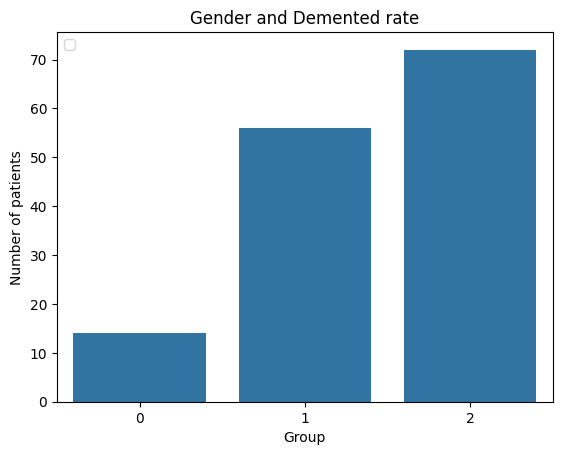

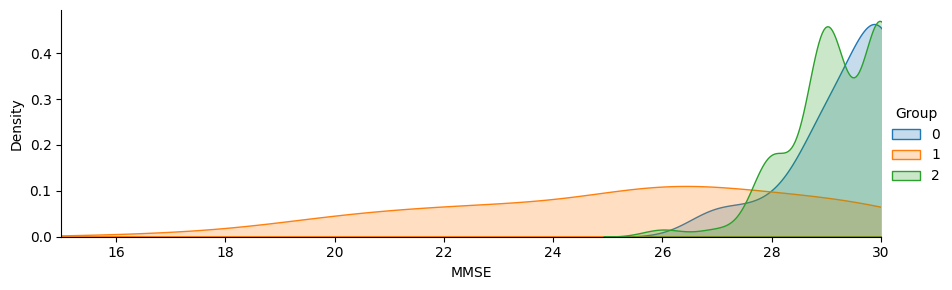

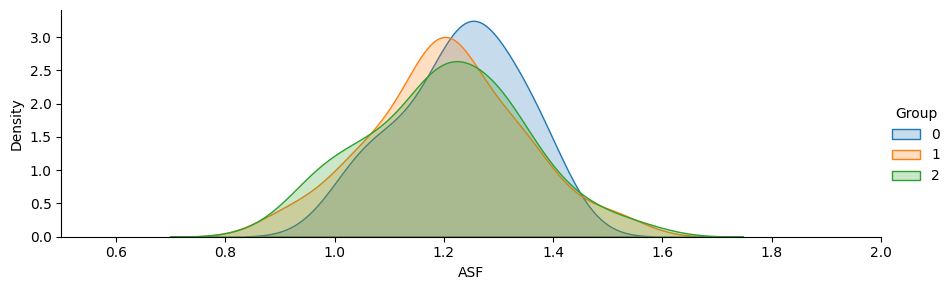

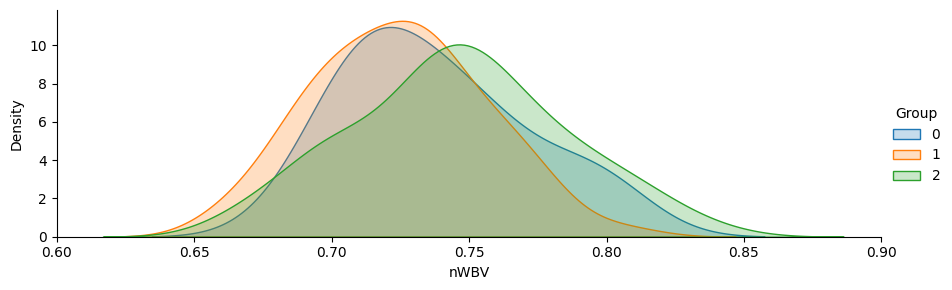

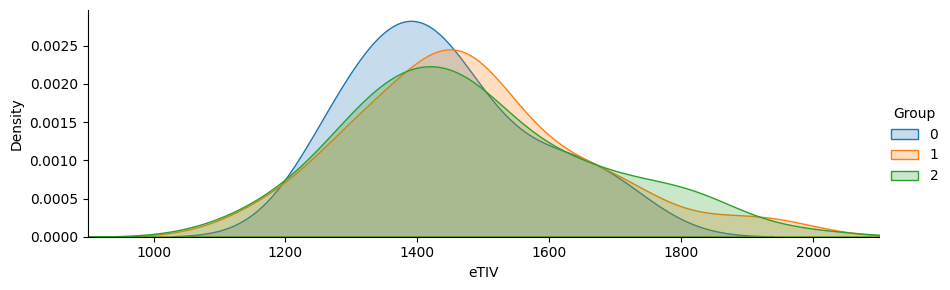

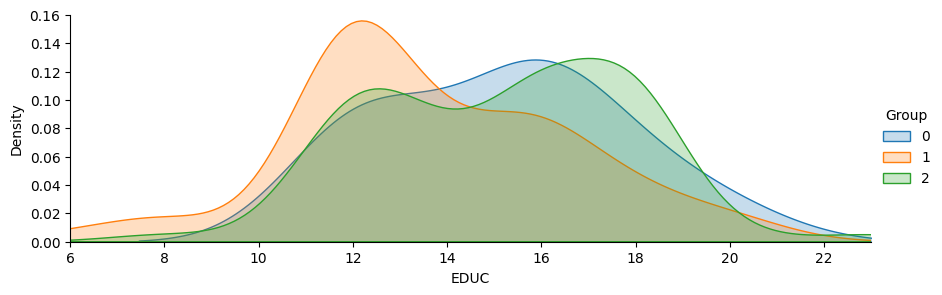

In [ ]:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import model_selection
data=pd.read_csv('DataBase.csv')
data.head()
data.shape
data.columns
data.describe()
data.info()
df= data.loc[data['Visit']==1]
df = df.reset_index(drop=True)
df.head()
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['M/F']=lab.fit_transform(df['M/F'])
df['Group']=lab.fit_transform(df['Group'])
df['Hand']=lab.fit_transform(df['Hand'])
df.head()
df1=df.drop(df[['Subject ID','MRI ID','Visit']],axis=1)
df1.head()
df1.isnull().sum()
df2= df1.dropna()
df2.isnull().sum()
df2.head()
sns.countplot(x='Group',data=df2)
def bar_chart(feature):
    Demented =df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True,figsize=(8,5))
    bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')

facet=sns.FacetGrid(df,hue='Group', aspect=3)
facet.map(sns.kdeplot,'MMSE',shade=True)
facet.set(xlim=(0,df['MMSE'].max()))
facet.add_legend()
plt.xlim(15,30)

facet=sns.FacetGrid(df,hue='Group', aspect=3)
facet.map(sns.kdeplot,'ASF',shade=True)
facet.set(xlim=(0,df['ASF'].max()))
facet.add_legend()
plt.xlim(0.5,2)

facet=sns.FacetGrid(df,hue='Group', aspect=3)
facet.map(sns.kdeplot,'nWBV',shade=True)
facet.set(xlim=(0,df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)


facet=sns.FacetGrid(df,hue='Group', aspect=3)
facet.map(sns.kdeplot,'eTIV',shade=True)
facet.set(xlim=(0,df['eTIV'].max()))
facet.add_legend()
plt.xlim(900,2100)

facet=sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade=True)
facet.set(xlim=(df['EDUC'].min(),df['EDUC'].max()))
facet.add_legend()
plt.ylim(0,0.16)

x=df2.iloc[:,df2.columns!='Group']
y=df2.iloc[:,df2.columns=='Group']

x.shape

x.head()

y.head()

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
xtrain.head()


ytrain.head()

from sklearn.svm import SVC
model1=SVC()

model1.fit(xtrain,ytrain)

predic1=model1.predict(xtest)

from sklearn.metrics import accuracy_score
acc1=accuracy_score(predic1,ytest)
acc1
from sklearn.metrics import classification_report

def apply_classifier(model1,xtrain,xtest,ytrain,ytest):
    model1.fit(xtrain,ytrain)
    predictions=model1.predict(xtest)
    print("\n classification report : \n {}",format(classification_report(ytest,predictions)))
apply_classifier(model1,xtrain,xtest,ytrain,ytest)
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(xtrain, ytrain)
apply_classifier(model_linear_kernal,xtrain,xtest,ytrain,ytest)
results = model_selection.cross_val_score(model_linear_kernal, x, y)
print("MeanSqareError(MSE): %.3f (%.3f)" % (results.mean(), results.std()))

from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier(random_state= 42)
apply_classifier(decision_tree,xtrain,xtest,ytrain,ytest)

from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(random_state=42)
apply_classifier(random_forest,xtrain,xtest,ytrain,ytest)


from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)
apply_classifier(model,xtrain,xtest,ytrain,ytest)